<a href="https://colab.research.google.com/github/ikonthomas/Loan_Repayment/blob/master/LoanPred_DataMunging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to train a model to learn to predict the labels from the given features with 0 meaning client will repay the loan on time while 1 means will have difficulty repaying loan.

In [0]:
#importing all the necessary libraries. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as  plt 
import seaborn as sns
from IPython.display import display

In [68]:
train_demographics = pd.read_csv('https://raw.githubusercontent.com/ikonthomas/Loan_Repayment/master/traindemographics.csv', parse_dates=['birthdate'])
train_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [69]:
test_demographics=pd.read_csv('https://raw.githubusercontent.com/ikonthomas/Loan_Repayment/master/testdemographics.csv', parse_dates=['birthdate'])
test_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


In [70]:
train_perf=pd.read_csv('https://raw.githubusercontent.com/ikonthomas/Loan_Repayment/master/trainperf.csv', parse_dates=['approveddate','creationdate'])
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good


In [71]:
test_perf=pd.read_csv('https://raw.githubusercontent.com/ikonthomas/Loan_Repayment/master/testperf.csv', parse_dates=['approveddate','creationdate'])
test_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


In [72]:
train_prevloans=pd.read_csv('https://raw.githubusercontent.com/ikonthomas/Loan_Repayment/master/trainprevloans.csv', parse_dates=['approveddate','creationdate','closeddate','firstduedate','firstrepaiddate']) 
train_prevloans.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


In [73]:
test_prevloans=pd.read_csv('https://raw.githubusercontent.com/ikonthomas/Loan_Repayment/master/testprevloans.csv', parse_dates=['approveddate','creationdate','closeddate','firstduedate','firstrepaiddate']) 
test_prevloans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55,10000.0,13000.0,30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52,30000.0,36800.0,60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16,30000.0,34400.0,30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14,2016-06-02 13:27:08,10000.0,13000.0,30,2016-07-04 11:34:04,NaN,2016-07-04,2016-07-04 11:19:01
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12,2016-05-16 08:13:04,10000.0,11500.0,15,2016-06-02 00:02:58,NaN,2016-05-31,2016-06-01 15:22:34


In [0]:
# Data Preparation

train_demographics['set'] = 'train'
test_demographics['set'] = 'test'
train_perf['set'] = 'train'
test_perf['set'] = 'test'
train_prevloans['set'] = 'train'
test_prevloans['set'] = 'test'


In [0]:
# merge datasets

demographics_data=pd.concat([train_demographics,test_demographics],sort=False)
performance_data=pd.concat([train_perf,test_perf],sort=False)
previous_data=pd.concat([train_prevloans,test_prevloans],sort=False)

In [76]:
demographics_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,set
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,train
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,train
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,train
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,train
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,train


In [77]:
demographics_data["bank_account_type"].value_counts()

Savings    4583
Other      1170
Current      80
Name: bank_account_type, dtype: int64

In [78]:
demographics_data["bank_name_clients"].value_counts()

GT Bank               2133
First Bank             793
Access Bank            568
UBA                    463
Zenith Bank            413
Diamond Bank           392
EcoBank                202
Stanbic IBTC           194
FCMB                   168
Skye Bank              147
Fidelity Bank          139
Sterling Bank           68
Wema Bank               37
Union Bank              36
Heritage Bank           27
Keystone Bank           25
Standard Chartered      19
Unity Bank               9
Name: bank_name_clients, dtype: int64

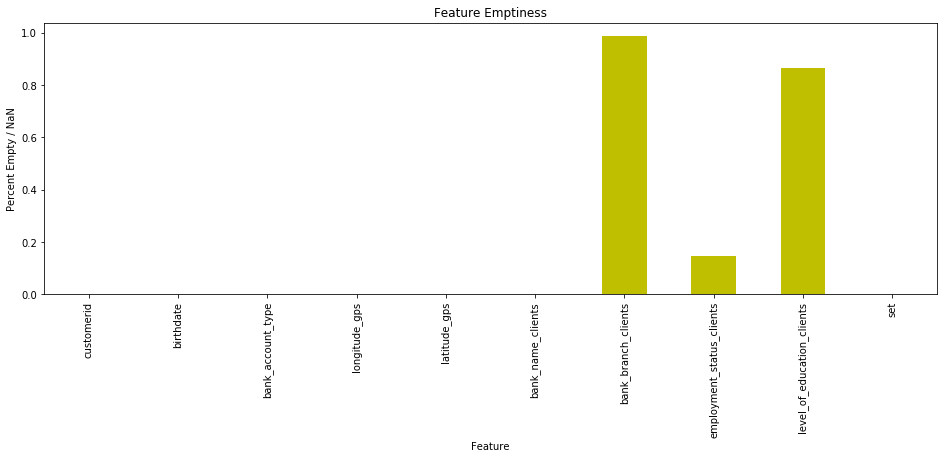

In [79]:
#demographics_data.isnull()
#["bank_name_clients"].unique()
import matplotlib.pyplot as plt
%matplotlib inline

percentage_missing_data = demographics_data.isnull().sum() / demographics_data.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='y', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [0]:
useless=['bank_branch_clients', 'level_of_education_clients']
demographics_data.drop(useless, axis=1, inplace=True)

In [81]:
demographics_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'set'],
      dtype='object')

In [82]:
import numpy as np
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = demographics_data.copy()

# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = temp_data.corr()

corr_matrix

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,set
customerid,1.000000,0.026593,0.099387,0.015852,-0.006700,0.011651,-0.038847,0.011140
birthdate,0.026593,1.000000,0.042586,0.008362,0.028859,-0.016665,0.147211,0.005069
bank_account_type,0.099387,0.042586,1.000000,0.013725,0.006594,-0.017822,-0.221284,0.012918
longitude_gps,0.015852,0.008362,0.013725,1.000000,-0.107959,-0.000201,0.000392,0.015924
latitude_gps,-0.006700,0.028859,0.006594,-0.107959,1.000000,-0.020504,-0.024447,0.019578
bank_name_clients,0.011651,-0.016665,-0.017822,-0.000201,-0.020504,1.000000,-0.033387,-0.002604
employment_status_clients,-0.038847,0.147211,-0.221284,0.000392,-0.024447,-0.033387,1.000000,-0.004246
set,0.011140,0.005069,0.012918,0.015924,0.019578,-0.002604,-0.004246,1.000000


In [83]:
demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5833 entries, 0 to 1486
Data columns (total 8 columns):
customerid                   5833 non-null object
birthdate                    5833 non-null datetime64[ns]
bank_account_type            5833 non-null object
longitude_gps                5833 non-null float64
latitude_gps                 5833 non-null float64
bank_name_clients            5833 non-null object
employment_status_clients    4968 non-null object
set                          5833 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 410.1+ KB


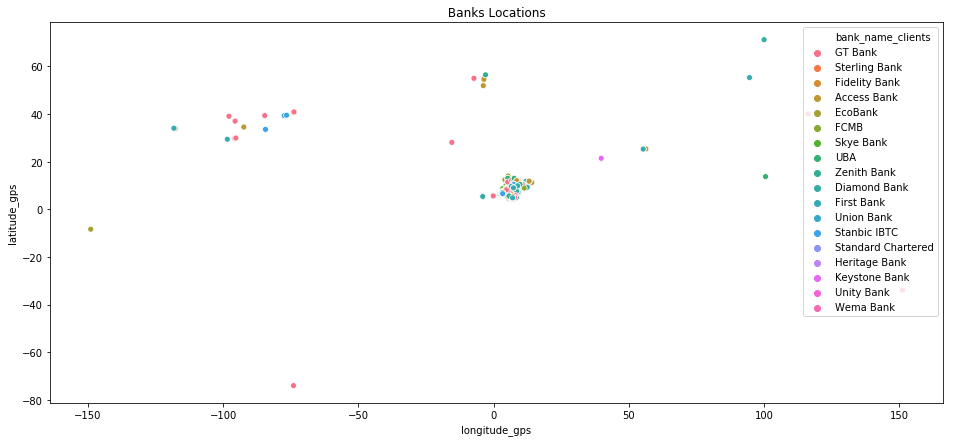

In [84]:
plt.figure(figsize=(16,7))
sns.scatterplot(x="longitude_gps", y="latitude_gps",hue="bank_name_clients",data=demographics_data)
plt.title(" Banks Locations ")
plt.legend()

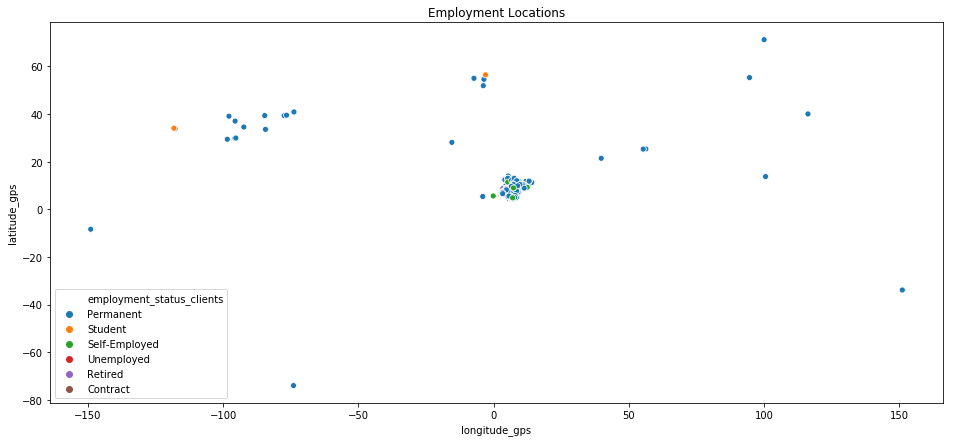

In [85]:
plt.figure(figsize=(16,7))
sns.scatterplot(x="longitude_gps", y="latitude_gps",hue="employment_status_clients",data=demographics_data)
plt.title("Employment Locations")
plt.legend()

In [86]:
demographics_data["employment_status_clients"].value_counts()

Permanent        4220
Self-Employed     470
Student           189
Unemployed         79
Retired             8
Contract            2
Name: employment_status_clients, dtype: int64

In [0]:
#Creating the Target Variable

target = {'Good':1,'Bad':0}
performance_data.good_bad_flag =performance_data.good_bad_flag.map(target)

In [88]:
#Checking the mapped Target
performance_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,set
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,1.0,train
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,1.0,train
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,1.0,train
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,1.0,train
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,1.0,train


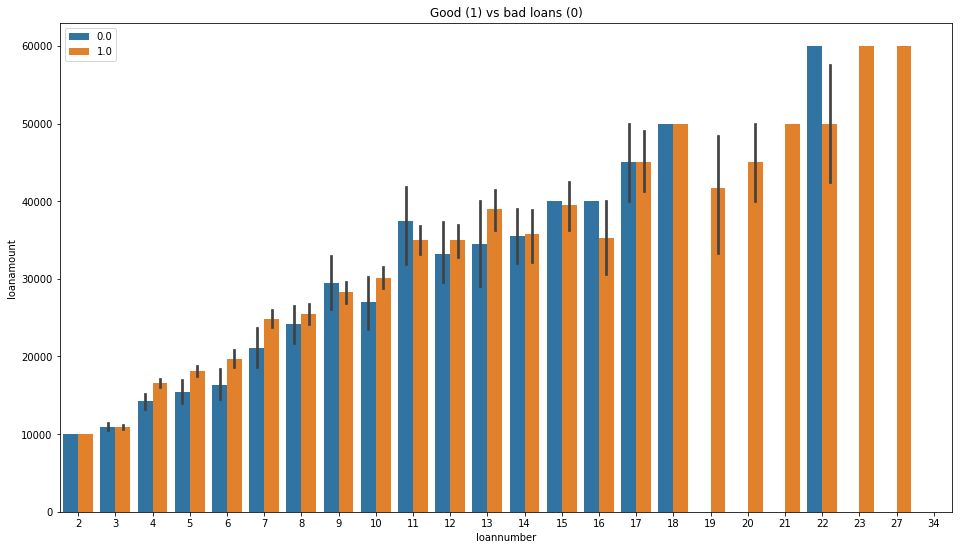

In [89]:
plt.figure(figsize=(16,9))
plt.title("Good (1) vs bad loans (0)")

sns.barplot(x="loannumber", y="loanamount", hue="good_bad_flag",data=performance_data)
plt.legend()

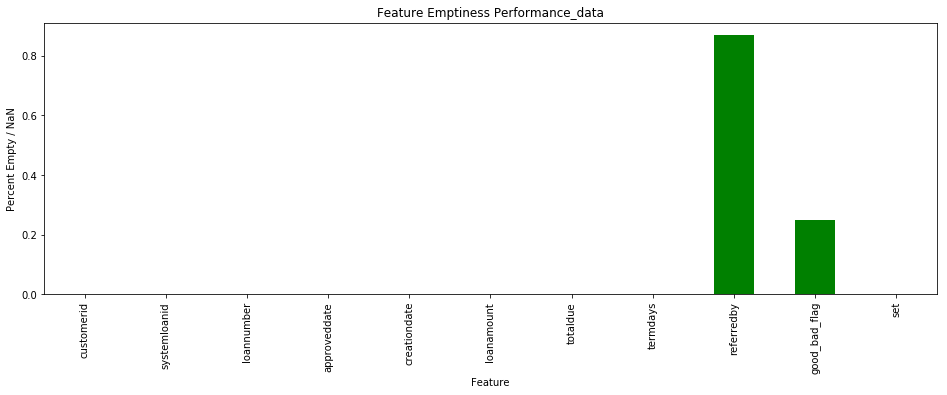

In [90]:
# performance data

%matplotlib inline

percentage_missing_data = performance_data.isnull().sum() / performance_data.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='g', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness Performance_data')
plt.show()

In [91]:

performance_data.drop('referredby', axis=1, inplace=True)
performance_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,set
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1.0,train
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1.0,train
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1.0,train
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1.0,train
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1.0,train


In [92]:
demographics_data.drop_duplicates(subset=demographics_data.columns,keep='last', inplace=True) # drops duplicates

#create new column
demographics_data['Age']=2019-demographics_data.birthdate.dt.year

demographics_data["bank_account_type"] = demographics_data["bank_account_type"].replace("Current", "Other")

demographics_data["Age"].head()

0    46
1    33
2    32
3    28
4    37
Name: Age, dtype: int64

In [93]:
previous_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,set
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43,train
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00,train
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47,train
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43,train
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35,train


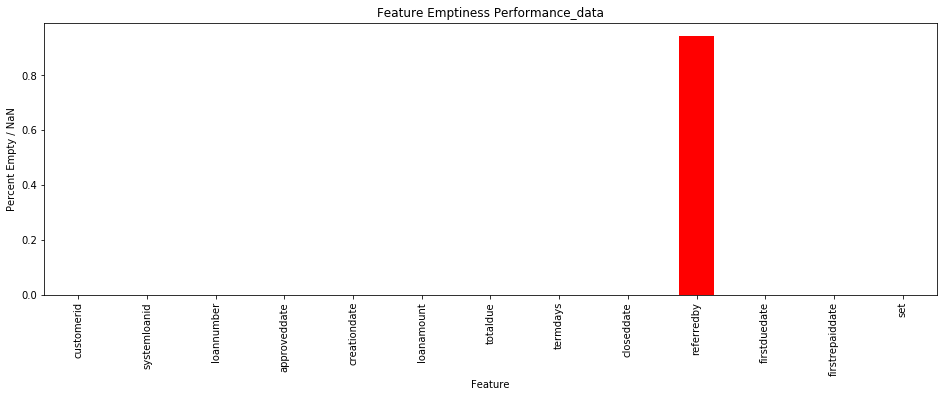

In [94]:
# previous loan data

%matplotlib inline

percentage_missing_data = previous_data.isnull().sum() / previous_data.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='r', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness Performance_data')
plt.show()

In [95]:
previous_data.drop('referredby', axis=1, inplace=True)
previous_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,set
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43,train
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00,train
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47,train
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,2017-04-24,2017-04-24 00:48:43,train
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,2017-07-03,2017-07-14 21:08:35,train


In [0]:
# profit the banks make
previous_data['profit']=previous_data['totaldue'] -previous_data['loanamount']

# this is the return days
previous_data['return_days']=previous_data.closeddate-previous_data.approveddate
previous_data['return_days']=previous_data['return_days'].apply(lambda x:int(str(x)[:2]))

#days left
previous_data['days_left']=previous_data.termdays-previous_data.return_days

In [0]:
# features extracted 


#Totalprofit
Totalprofit=previous_data.pivot_table(values='profit',index='customerid',aggfunc=sum)
Totalprofit.rename(columns={'profit':'Totalprofit'},inplace=True)

#Avgprofit
Avgprofit=previous_data.pivot_table(values='profit',index='customerid',aggfunc=np.mean)
Avgprofit.rename(columns={'profit':'Avgprofit'},inplace=True)

#Avgloanamount
Avgloanamount=previous_data.pivot_table(values='loanamount',index='customerid',aggfunc=np.mean)
Avgloanamount.rename(columns={'loanamount':'Avgloanamount'},inplace=True)

#Avgtermdays
Avgtermdays=previous_data.pivot_table(values='termdays',index='customerid',aggfunc=np.mean)
Avgtermdays.rename(columns={'termdays':'Avgtermdays'},inplace=True)

#earlypayment
earlypayment=previous_data.pivot_table(values='days_left',index='customerid',aggfunc=lambda x:(x>=0).sum())
earlypayment.rename(columns={'days_left':'earlypayment'},inplace=True)

#Avgdaysleft
Avgdaysleft=previous_data.pivot_table(values='days_left',index='customerid',aggfunc=np.mean)
Avgdaysleft.rename(columns={'days_left':'Avgdaysleft'},inplace=True)


loan_data=[Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment]
loan_data=loan_data[0].join(loan_data[1:])

In [98]:
performance_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,set
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1.0,train
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1.0,train
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1.0,train
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1.0,train
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1.0,train


In [0]:
performance_data['new_profit']=performance_data['totaldue']-performance_data['loanamount'] # synthetic feature

In [100]:

useless=['systemloanid','creationdate','approveddate','totaldue']

performance_data.drop(useless,axis=1,inplace=True)
performance_data.head()

,customerid,loannumber,loanamount,termdays,good_bad_flag,set,new_profit
0,8a2a81a74ce8c05d014cfb32a0da1049,12,30000.0,30,1.0,train,4500.0
1,8a85886e54beabf90154c0a29ae757c0,2,15000.0,30,1.0,train,2250.0
2,8a8588f35438fe12015444567666018e,7,20000.0,15,1.0,train,2250.0
3,8a85890754145ace015429211b513e16,3,10000.0,15,1.0,train,1500.0
4,8a858970548359cc0154883481981866,9,40000.0,30,1.0,train,4000.0


In [101]:
featured_data = pd.merge(loan_data.reset_index(),performance_data,how='outer',on='customerid')
featured_data.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,set,new_profit
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,2,10000.0,15,0.0,train,1500.0
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,5,30000.0,60,1.0,train,9000.0
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,8,20000.0,30,1.0,train,4500.0
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,9,30000.0,60,1.0,train,9000.0
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,3,10000.0,15,1.0,train,1500.0


In [0]:
# feature engineering continued

featured_data['loanamountdeviation']=featured_data.Avgloanamount-featured_data.loanamount
featured_data['profitdeviation']=featured_data.Avgprofit-featured_data.new_profit
featured_data['termdaysdeviation']=featured_data.Avgtermdays-featured_data.termdays

In [103]:

# merge this featured data with demographic data to feed model
new_featured_data = pd.merge(featured_data,demographics_data,how='inner',on='customerid')
new_featured_data.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,set_x,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,set_y,Age
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,2,10000.0,15,0.0,train,1500.0,0.000000,0.000000,0.000000,1989-11-09,Savings,3.351667,6.657019,GT Bank,Permanent,train,30
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,5,30000.0,60,1.0,train,9000.0,-12500.000000,-4125.000000,-22.500000,1979-10-18,Other,3.395230,6.592191,Standard Chartered,Permanent,train,40
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,8,20000.0,30,1.0,train,4500.0,-7142.857143,-2142.857143,-10.714286,1979-01-29,Savings,3.306388,6.651843,GT Bank,Permanent,train,40
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,9,30000.0,60,1.0,train,9000.0,-13750.000000,-4950.000000,-26.250000,1978-11-25,Savings,3.426698,6.423048,First Bank,Permanent,train,41
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,3,10000.0,15,1.0,train,1500.0,0.000000,750.000000,7.500000,1978-04-07,Savings,6.976132,4.801001,GT Bank,Permanent,test,41


In [0]:
#drop columns I dont need 
new_featured_data.drop(columns=['set_x','set_y','bank_name_clients',"birthdate"],inplace=True)

In [107]:
new_featured_data.columns

Index(['customerid', 'Totalprofit', 'Avgprofit', 'Avgloanamount',
       'Avgtermdays', 'Avgdaysleft', 'earlypayment', 'loannumber',
       'loanamount', 'termdays', 'good_bad_flag', 'new_profit',
       'loanamountdeviation', 'profitdeviation', 'termdaysdeviation',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'employment_status_clients', 'Age'],
      dtype='object')

In [0]:
new_featured_data.fillna(0, inplace=True)



from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

new_featured_data["bank_account_type"] = encode.fit_transform(new_featured_data['bank_account_type'])


# Numeric encoding
new_featured_data["level_of_education_clients"] = new_featured_data["level_of_education_clients"].map({"Primary":1,
                                                                                                       "Graduate":2,
                                                                                                       "Secondary":3,
                                                                                                       "Post-Graduate":4})


new_featured_data["employment_status_clients"] = new_featured_data["employment_status_clients"].map({"Permanent":1,
                                                                                                       "Student":2,
                                                                                                       "Self-Employed":3})

In [108]:
# fill in nan
new_featured_data.fillna(0, inplace=True)
new_featured_data.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,Age
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,2,10000.0,15,0.0,1500.0,0.000000,0.000000,0.000000,Savings,3.351667,6.657019,Permanent,30
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,5,30000.0,60,1.0,9000.0,-12500.000000,-4125.000000,-22.500000,Other,3.395230,6.592191,Permanent,40
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,8,20000.0,30,1.0,4500.0,-7142.857143,-2142.857143,-10.714286,Savings,3.306388,6.651843,Permanent,40
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,9,30000.0,60,1.0,9000.0,-13750.000000,-4950.000000,-26.250000,Savings,3.426698,6.423048,Permanent,41
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,3,10000.0,15,1.0,1500.0,0.000000,750.000000,7.500000,Savings,6.976132,4.801001,Permanent,41


In [109]:
from joblib import dump
dump(new_featured_data,'Train.joblib')

['Train.joblib']